Loading training dataset...
Training dataset loaded successfully.
Loading testing dataset...
Testing dataset loaded successfully.
Converting text data to TF-IDF features...


c:\Users\M.Ubaid Ullah\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training model with detailed epoch logging...
Epoch 1/300
10844/10844 ━━━━━━━━━━━━━━━━━━━━ 363s 33ms/step - accuracy: 0.7538 - loss: 0.4731 - val_accuracy: 0.9858 - val_loss: 0.0453
Epoch 2/300
10844/10844 ━━━━━━━━━━━━━━━━━━━━ 347s 32ms/step - accuracy: 0.9867 - loss: 0.0461 - val_accuracy: 0.9891 - val_loss: 0.0341
Epoch 3/300
10844/10844 ━━━━━━━━━━━━━━━━━━━━ 351s 32ms/step - accuracy: 0.9922 - loss: 0.0265 - val_accuracy: 0.9903 - val_loss: 0.0335
Epoch 4/300
10844/10844 ━━━━━━━━━━━━━━━━━━━━ 347s 32ms/step - accuracy: 0.9952 - loss: 0.0174 - val_accuracy: 0.9885 - val_loss: 0.0421
Epoch 5/300
10844/10844 ━━━━━━━━━━━━━━━━━━━━ 389s 36ms/step - accuracy: 0.9961 - loss: 0.0134 - val_accuracy: 0.9903 - val_loss: 0.0389
Epoch 6/300
10844/10844 ━━━━━━━━━━━━━━━━━━━━ 410s 33ms/step - accuracy: 0.9968 - loss: 0.0112 - val_accuracy: 0.9913 - val_loss: 0.0342
Epoch 7/300
10844/10844 ━━━━━━━━━━━━━━━━━━━━ 382s 35ms/step - accuracy: 0.9974 - loss: 0.0089 - val_accuracy: 0.9906 - val_loss: 0.0377
Ep

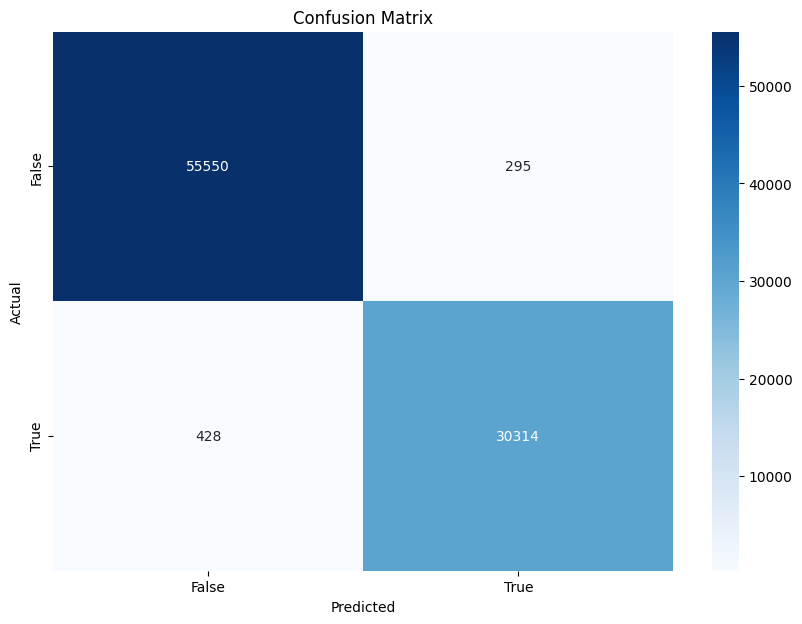

Saving the trained model and the TF-IDF vectorizer...
Trained model and TF-IDF vectorizer saved successfully!


In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD
import joblib
import tensorflow as tf

# Load the training dataset
train_file_path = r'./final_train.csv'
print("Loading training dataset...")
train_data = pd.read_csv(train_file_path)
print("Training dataset loaded successfully.")

# Load the testing dataset
test_file_path = r'./final_test.csv'
print("Loading testing dataset...")
test_data = pd.read_csv(test_file_path)
print("Testing dataset loaded successfully.")

# Extract features and target from training data
X_train = train_data['text']
y_train = train_data['label']

# Extract features and target from testing data
X_test = test_data['text']
y_test = test_data['label']

# Text preprocessing: Convert text to TF-IDF features
print("Converting text data to TF-IDF features...")
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Define the Keras model
model = Sequential([
    Dense(128, input_shape=(X_train_tfidf.shape[1],), activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=SGD(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True, verbose=1)

# Train the model with detailed epoch logging
print("Training model with detailed epoch logging...")
model.fit(X_train_tfidf, y_train, epochs=300, batch_size=32, validation_data=(X_test_tfidf, y_test), callbacks=[early_stopping], verbose=1)
print("Model trained successfully!")

# Evaluate the model on the testing set
print("Evaluating the model on the testing set...")
y_test_pred_prob = model.predict(X_test_tfidf).flatten()
y_test_pred = np.where(y_test_pred_prob > 0.5, 1, 0)
conf_matrix = confusion_matrix(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
accuracy = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

# Print test evaluation metrics
print("Test Evaluation Metrics:")
print("Confusion Matrix:\n", conf_matrix)
print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)
print("F1 Score:", f1)

# Plot the confusion matrix
print("Plotting the confusion matrix...")
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['False', 'True'], yticklabels=['False', 'True'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Save the trained model and the TF-IDF vectorizer
print("Saving the trained model and the TF-IDF vectorizer...")
model.save('keras_text_classification_model.h5')
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.h5')
print("Trained model and TF-IDF vectorizer saved successfully!")
